<a href="https://colab.research.google.com/github/MWaq2803/Int2GroupProject/blob/main/oxford_flowers102_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INT2 Team 31 Group Project**

In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
import tensorflow as tf

# **Importing the oxford flowers102 dataset**

In [ ]:
import tensorflow_datasets as tfds
ds,info_train = tfds.load('oxford_flowers102', split='train', shuffle_files=True, with_info=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


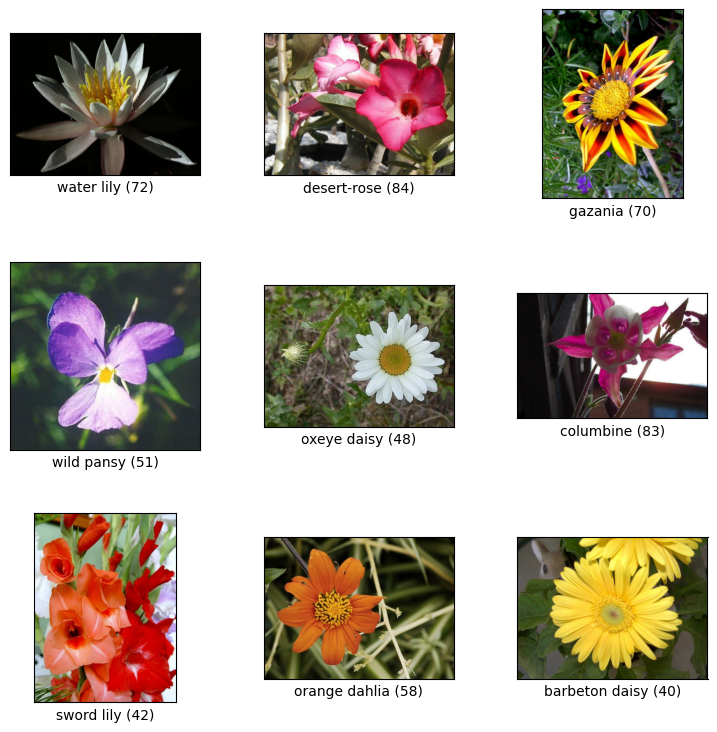

In [ ]:
fig = tfds.show_examples(ds, info_train)

# **Instialising the training and testing sets as panda dataframes**

In [ ]:

flowers_training = tfds.as_dataframe(ds, info_train)
ds2, info_test = tfds.load('oxford_flowers102', split='test', shuffle_files=True, with_info=True)
ds3, info_te = tfds.load('oxford_flowers102', shuffle_files=True, with_info=True)
flowers_testing = tfds.as_dataframe(ds2, info_test)
print(flowers_training.info())
print(flowers_testing.info())
print(type(ds3))

<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1020 non-null   object
 1   image      1020 non-null   object
 2   label      1020 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ KB
None
<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  6149 non-null   object
 1   image      6149 non-null   object
 2   label      6149 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 144.2+ KB
None


In [ ]:
from tensorflow import keras
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
print(type(ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>


In [ ]:
epochs=10
history = model.fit(
  tf.data.Dataset.from_tensor_slices(list(ds2)),
  validation_data=tf.data.Dataset.from_tensor_slices(list(ds3)),
  epochs=epochs
)

TypeError: ignored